In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
(train_img, train_label), (test_img, test_label) = tf.keras.datasets.mnist.load_data()

In [3]:
print(train_img.shape)
print(train_label)

(60000, 28, 28)
[5 0 4 ... 5 6 8]


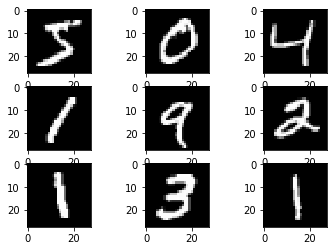

In [4]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(train_img[i]/255, cmap = 'gray')
    

In [5]:
TRAIN_SIZE = len(train_img)
train_img = np.reshape(train_img,(TRAIN_SIZE, 784))
train_img = train_img /255 #normalize

In [88]:
def add_layer(inputs, in_size, out_size, activation_function=None):
    Weights = tf.Variable(tf.truncated_normal(shape=(in_size,out_size)))
    biases = tf.Variable(tf.random_normal([out_size]))
    if activation_function is None:
        output = tf.matmul(inputs,Weights) + biases
    else:
        output = activation_function(tf.matmul(inputs,Weights) + biases)
    return output

x= tf.placeholder(tf.float32, shape = (None, 784))
y= tf.placeholder(tf.float32, shape = (None, 784))

elayer1 = tf.nn.sigmoid(add_layer(x, 784, 512))
elayer2 = tf.nn.sigmoid(add_layer(elayer1, 512, 128))
elayer3 = tf.nn.sigmoid(add_layer(elayer2, 128, 64))
elayer4 = tf.nn.sigmoid(add_layer(elayer3, 64, 5))
dlayer1 = tf.nn.sigmoid(add_layer(elayer4, 5, 64))
dlayer2 = tf.nn.sigmoid(add_layer(dlayer1, 64,128))
dlayer3 = tf.nn.sigmoid(add_layer(dlayer2, 128,512))
output = tf.nn.sigmoid(add_layer(dlayer3, 512, 784))

loss = tf.reduce_mean(tf.pow(y - output, 2))
optimizer = tf.train.AdamOptimizer(0.001).minimize(loss)
epoch = 20
batch_size = 128

In [89]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for epoch in range(epoch):
    index = [i for i in range(train_img.shape[0])]
    random.shuffle(index)
    while len(index) > 0:
        index_size = len(index)
        batch_index = [index.pop() for _ in range(min(batch_size, index_size))]
        batch_x = train_img[batch_index]
        batch_x_noise = batch_x + 0.3* np.random.rand(batch_x.shape[0],784)
        sess.run(optimizer, feed_dict={x:batch_x_noise,y:batch_x})
    print('epoch: {} loss: {}'.format(epoch+1, sess.run(loss,feed_dict={x:batch_x_noise,y:batch_x})))

epoch: 1 loss: 0.140926331281662
epoch: 2 loss: 0.1253214180469513
epoch: 3 loss: 0.11198467016220093
epoch: 4 loss: 0.10485566407442093
epoch: 5 loss: 0.0974019318819046
epoch: 6 loss: 0.09053408354520798
epoch: 7 loss: 0.08749794214963913
epoch: 8 loss: 0.08541889488697052
epoch: 9 loss: 0.08158036321401596
epoch: 10 loss: 0.0832124799489975
epoch: 11 loss: 0.07671923190355301
epoch: 12 loss: 0.07257548719644547
epoch: 13 loss: 0.06841311603784561
epoch: 14 loss: 0.07046970725059509
epoch: 15 loss: 0.06754963099956512
epoch: 16 loss: 0.06478460133075714
epoch: 17 loss: 0.06472361832857132
epoch: 18 loss: 0.06381753087043762
epoch: 19 loss: 0.06319648772478104
epoch: 20 loss: 0.06510129570960999


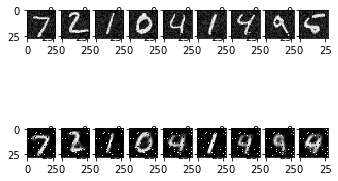

In [90]:
#實際加入noise後
testX_noise = test_img / 255 + 0.3 * np.random.rand(test_img.shape[0],28,28)
for i in range(9):
    plt.subplot(2,10,i+1)
    #img = np.reshape(testX_noise[i], (28,28))
    plt.imshow(testX_noise[i], cmap = 'gray')
    
#經DAE的輸出
for i in range(9):
    test = np.reshape(testX_noise[i],(1, 784))
    predict = sess.run(output, feed_dict = {x:test})
    predict = np.reshape(np.array(predict), (28, 28))
    plt.subplot(2,10,11+i)
    plt.imshow(predict, cmap = 'gray')   

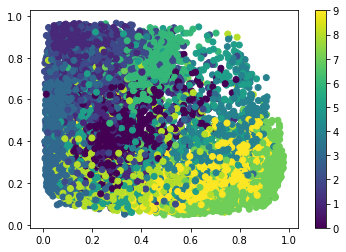

In [91]:
encoder_result = sess.run(elayer4, feed_dict={x: np.reshape(test_img/255,(test_img.shape[0],784))})
plt.scatter(encoder_result[:, 0], encoder_result[:, 1], c=test_label)
plt.colorbar()
plt.show()